# Linear Regression - Experiments

This notebook explores different scenarios and behaviors of linear regression:

1. Effect of learning rate
2. Effect of feature scaling
3. Behavior with different dataset sizes
4. Handling outliers
5. Multiple features (multivariate regression)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')  # To import utils from parent directory
from utils import (
    compute_cost, gradient_descent, normal_equation,
    add_bias, predict, r2_score, mean_squared_error
)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

---
## Experiment 1: Effect of Learning Rate

Learning rate ($\alpha$) controls the step size in gradient descent.

- **Too small**: Slow convergence
- **Too large**: Overshooting, divergence
- **Just right**: Fast, stable convergence

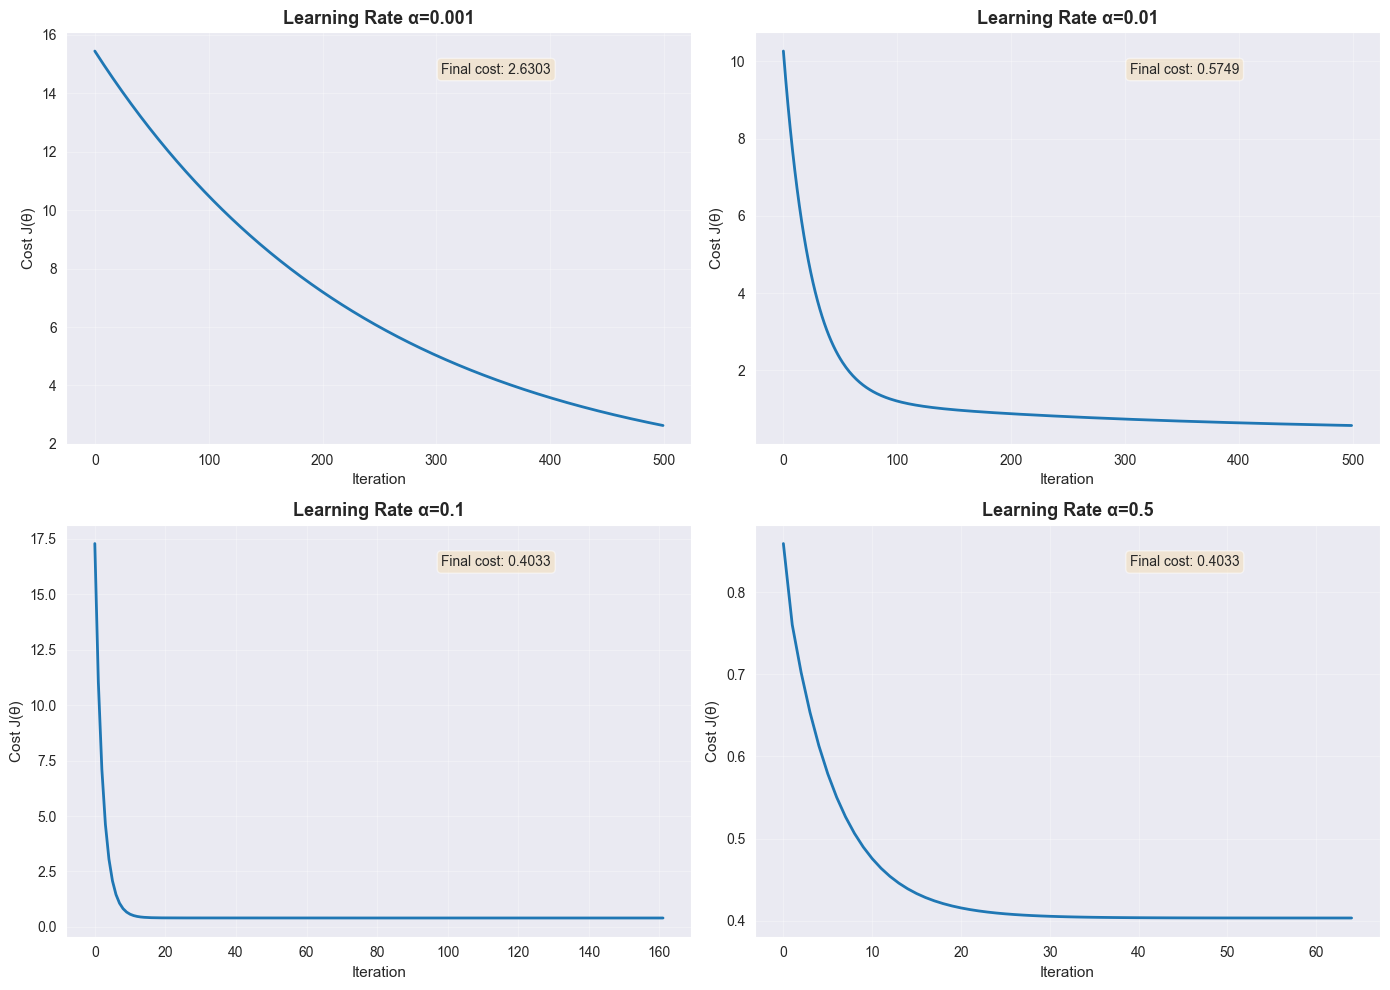

In [2]:
# Generate data
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = add_bias(X)

# Test different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
n_iterations = 500

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, lr in enumerate(learning_rates):
    # Run gradient descent
    theta, cost_history = gradient_descent(X_b, y, learning_rate=lr,
                                          n_iterations=n_iterations, verbose=False)
    
    # Plot cost history
    axes[idx].plot(cost_history, linewidth=2)
    axes[idx].set_xlabel('Iteration', fontsize=11)
    axes[idx].set_ylabel('Cost J(θ)', fontsize=11)
    axes[idx].set_title(f'Learning Rate α={lr}', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Add final cost as text
    final_cost = cost_history[-1] if len(cost_history) > 0 else float('inf')
    axes[idx].text(0.6, 0.9, f'Final cost: {final_cost:.4f}',
                   transform=axes[idx].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

### Observation

- **α=0.001**: Very slow convergence
- **α=0.01**: Steady convergence
- **α=0.1**: Fast convergence
- **α=0.5**: May oscillate or diverge (dataset dependent)

**Key Insight**: Choosing the right learning rate is critical!

---
## Experiment 2: Feature Scaling

When features have different scales, gradient descent can converge slowly.

**Solution**: Feature normalization (standardization)

In [3]:
# Generate data with different scales
m = 100
X1 = np.random.rand(m, 1) * 1000  # Feature 1: 0-1000
X2 = np.random.rand(m, 1) * 0.01  # Feature 2: 0-0.01
X_unscaled = np.c_[X1, X2]
y = 3 + 2 * X1 + 500 * X2 + np.random.randn(m, 1) * 10

# With bias
X_unscaled_b = add_bias(X_unscaled)

# Scaled version (standardization: (x-mean)/std)
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_scaled = standardize(X_unscaled)
X_scaled_b = add_bias(X_scaled)

print(f'Unscaled X - mean: {X_unscaled.mean(axis=0)}, std: {X_unscaled.std(axis=0)}')
print(f'Scaled X - mean: {X_scaled.mean(axis=0)}, std: {X_scaled.std(axis=0)}')

Unscaled X - mean: [5.18791336e+02 5.00604009e-03], std: [2.97010845e+02 2.97912642e-03]
Scaled X - mean: [-3.26405569e-16  1.93178806e-16], std: [1. 1.]


E:\My Projects\My Data Science Repo\ml-math-from-scratch\01_linear_regression\utils.py:36: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(errors ** 2)
E:\My Projects\My Data Science Repo\ml-math-from-scratch\01_linear_regression\utils.py:114: RuntimeWarning: invalid value encountered in scalar subtract
  cost_diff = abs(cost_history[-2] - cost_history[-1])
E:\My Projects\My Data Science Repo\ml-math-from-scratch\01_linear_regression\utils.py:61: RuntimeWarning: overflow encountered in dot
  gradients = (1 / m) * X.T.dot(errors)
E:\My Projects\My Data Science Repo\ml-math-from-scratch\01_linear_regression\utils.py:106: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * gradients


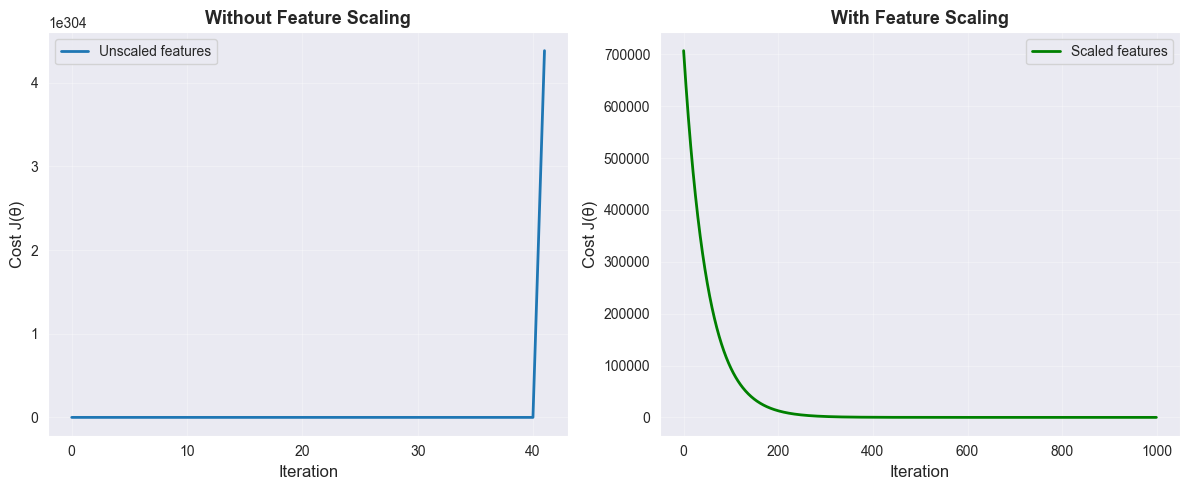

Final cost (unscaled): nan
Final cost (scaled): 53.2284


In [4]:
# Compare convergence
lr = 0.01
n_iter = 1000

# Unscaled
theta_unscaled, cost_unscaled = gradient_descent(X_unscaled_b, y, learning_rate=lr,
                                                 n_iterations=n_iter, verbose=False)

# Scaled
theta_scaled, cost_scaled = gradient_descent(X_scaled_b, y, learning_rate=lr,
                                            n_iterations=n_iter, verbose=False)

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_unscaled, linewidth=2, label='Unscaled features')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(θ)', fontsize=12)
plt.title('Without Feature Scaling', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(cost_scaled, linewidth=2, label='Scaled features', color='green')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(θ)', fontsize=12)
plt.title('With Feature Scaling', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Final cost (unscaled): {cost_unscaled[-1]:.4f}')
print(f'Final cost (scaled): {cost_scaled[-1]:.4f}')

### Key Insight

**Feature scaling dramatically improves convergence speed!**

Always standardize features when using gradient descent.

---
## Experiment 3: Effect of Dataset Size

How does performance change with more data?

C:\Users\Sreekar\AppData\Local\Temp\ipykernel_27148\740025712.py:45: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sreekar\AppData\Local\Temp\ipykernel_27148\740025712.py:45: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sreekar\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


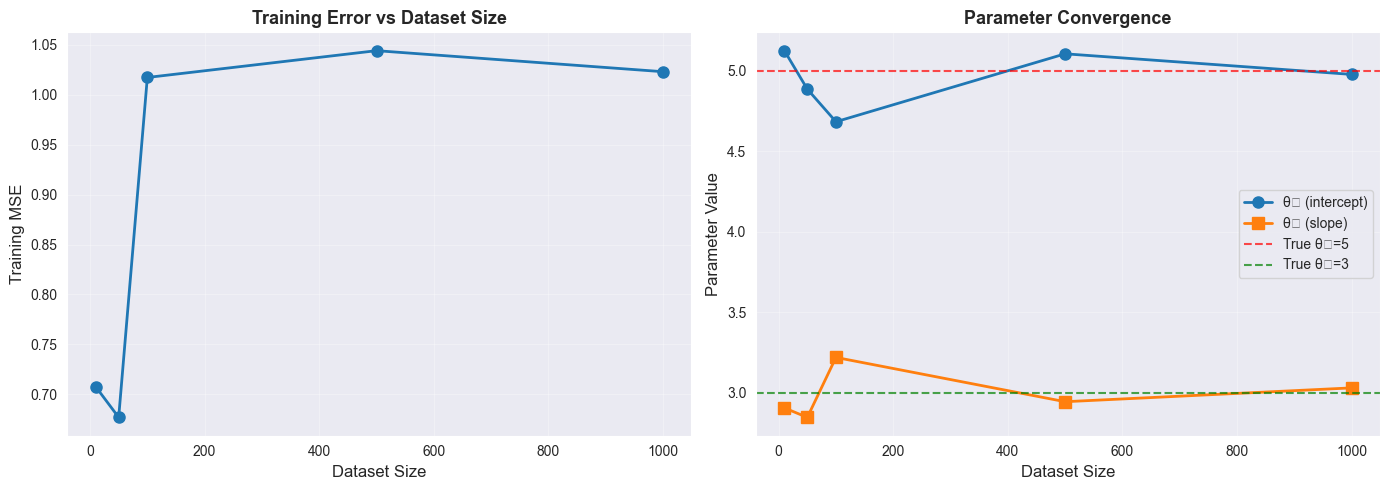

In [5]:
# Test different dataset sizes
sizes = [10, 50, 100, 500, 1000]
train_errors = []
theta_estimates = []

for size in sizes:
    # Generate data
    X = 2 * np.random.rand(size, 1)
    y = 5 + 3 * X + np.random.randn(size, 1)
    X_b = add_bias(X)
    
    # Train using normal equation
    theta = normal_equation(X_b, y)
    theta_estimates.append(theta)
    
    # Compute training error
    y_pred = predict(X_b, theta)
    mse = mean_squared_error(y, y_pred)
    train_errors.append(mse)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training error vs dataset size
axes[0].plot(sizes, train_errors, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Dataset Size', fontsize=12)
axes[0].set_ylabel('Training MSE', fontsize=12)
axes[0].set_title('Training Error vs Dataset Size', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Parameter estimates vs dataset size
theta0_vals = [t[0][0] for t in theta_estimates]
theta1_vals = [t[1][0] for t in theta_estimates]

axes[1].plot(sizes, theta0_vals, marker='o', linewidth=2, label='θ₀ (intercept)', markersize=8)
axes[1].plot(sizes, theta1_vals, marker='s', linewidth=2, label='θ₁ (slope)', markersize=8)
axes[1].axhline(y=5, color='r', linestyle='--', label='True θ₀=5', alpha=0.7)
axes[1].axhline(y=3, color='g', linestyle='--', label='True θ₁=3', alpha=0.7)
axes[1].set_xlabel('Dataset Size', fontsize=12)
axes[1].set_ylabel('Parameter Value', fontsize=12)
axes[1].set_title('Parameter Convergence', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Observation

- With **more data**, parameter estimates get closer to true values
- Training error stabilizes as we add more examples
- This demonstrates the **law of large numbers**

---
## Summary: Key Learnings

### Experiment 1: Learning Rate
- Too small → slow convergence
- Too large → overshooting/divergence
- Typical values: 0.01 to 0.1

### Experiment 2: Feature Scaling
- Always standardize features for faster convergence
- Formula: $(x - \mu) / \sigma$

### Experiment 3: Dataset Size
- More data → better parameter estimates
- Law of large numbers in action

---

**You now understand how linear regression behaves in different scenarios!**

This knowledge is critical for:
- Debugging poor performance
- Choosing hyperparameters
- Understanding when linear regression works well